<a href="https://colab.research.google.com/github/HabilMB/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load dataset, remove bad lines
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227811 entries, 0 to 227810
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227811 non-null  float64
 1   V1      227811 non-null  float64
 2   V2      227811 non-null  float64
 3   V3      227811 non-null  float64
 4   V4      227811 non-null  float64
 5   V5      227811 non-null  float64
 6   V6      227811 non-null  float64
 7   V7      227811 non-null  float64
 8   V8      227811 non-null  float64
 9   V9      227811 non-null  float64
 10  V10     227811 non-null  float64
 11  V11     227811 non-null  float64
 12  V12     227811 non-null  float64
 13  V13     227811 non-null  float64
 14  V14     227811 non-null  float64
 15  V15     227811 non-null  float64
 16  V16     227811 non-null  float64
 17  V17     227811 non-null  float64
 18  V18     227811 non-null  float64
 19  V19     227811 non-null  float64
 20  V20     227811 non-null  float64
 21  V21     22

In [ ]:
#check missing valeus
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

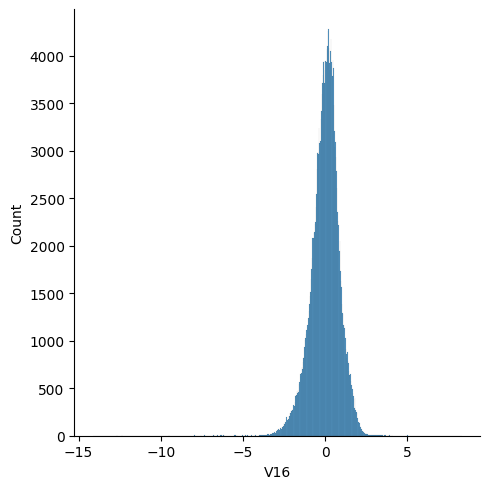

In [ ]:
#analyze the values
sns.displot(credit_card_data.V16)

In [ ]:
#fill the null file with value of 0, if any
credit_card_data.fillna(0, inplace=True)
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    227394
1.0       417
Name: Class, dtype: int64

0 --> Normal Transaction

1 --> Fraudulent Transaction

In [ ]:
#seperating data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(227394, 31)
(417, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    227394.000000
mean         90.768192
std         250.503763
min           0.000000
25%           6.000000
50%          23.420000
75%          79.970000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     417.000000
mean      125.656379
std       256.880976
min         0.000000
25%         1.000000
50%        12.310000
75%       106.900000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,79054.416761,-0.057507,-0.020879,0.196663,0.035341,-0.057038,0.033050,-0.015449,0.002821,0.007170,...,0.009269,-0.008029,-0.022989,-0.009831,0.001238,0.038083,0.002753,-0.000145,0.001862,90.768192
1.0,67308.333333,-5.381276,3.958775,-7.454069,4.655050,-3.775485,-1.357987,-6.264641,0.663762,-2.696376,...,0.376889,0.765659,0.013088,-0.060036,-0.083433,0.051373,0.037788,0.202087,0.057439,125.656379


Under-Sampling

Number of fraud transcations ->162

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
#concat 2 dataframes

new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223572,143434.0,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,...,0.727415,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,1.00,1.0
223578,143438.0,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,...,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,8.90,1.0
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,...,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1.00,1.0
226814,144808.0,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,667.55,1.0
226877,144839.0,-6.423306,1.658515,-5.866440,2.052064,-0.615817,-3.372266,-5.036556,2.643106,-2.274630,...,0.641211,-0.256678,-2.337233,-0.158278,1.198797,-0.261258,0.780125,-0.731801,0.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0    417
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,79074.947154,0.072079,-0.022846,0.142784,0.096685,0.004067,-0.031084,-0.011244,-0.013873,0.044602,...,0.008369,0.007379,-0.024204,0.000219,0.037934,0.035682,0.000515,0.008652,-0.010558,80.832602
1.0,67308.333333,-5.381276,3.958775,-7.454069,4.655050,-3.775485,-1.357987,-6.264641,0.663762,-2.696376,...,0.376889,0.765659,0.013088,-0.060036,-0.083433,0.051373,0.037788,0.202087,0.057439,125.656379


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(Y)

73371     0.0
14017     0.0
156379    0.0
192640    0.0
131737    0.0
         ... 
223572    1.0
223578    1.0
223618    1.0
226814    1.0
226877    1.0
Name: Class, Length: 909, dtype: float64


Split data into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(909, 30) (727, 30) (182, 30)


Create the model then train it

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9463548830811555


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9285714285714286
